初始記憶體狀態：
已分配: 0.13 GiB
已保留: 4.76 GiB
運行 YOLOv8 前記憶體狀態：
已分配: 0.13 GiB
已保留: 4.76 GiB

image 1/1 /workspace/MVIMG_20230331_082423.jpg: 480x640 1 sjb_rect, 6.0ms
Speed: 1.5ms preprocess, 6.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
裁剪圖片已保存，檢測框： (968, 727, 2607, 2525)
裁剪圖片另存為 cropped_check.jpg，請檢查內容
YOLOv8 檢測框： (968, 727, 2607, 2525)
運行 VLM 前記憶體狀態：
已分配: 0.17 GiB
已保留: 0.19 GiB
正在載入 Qwen2-VL 模型...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

正在處理圖片...
正在生成輸入...
正在生成描述...


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

生成的描述： 這張圖片展示了一個灰色的三角形尺子，尺子的邊緣有一個小孔，可能是用來固定或固定尺子的。尺子的表面有一個三角形的標記，可能是用來標記特定的長度或角度。尺子的底面是平的，沒有任何其他附屬物或標記。
VLM 返回的描述： 這張圖片展示了一個灰色的三角形尺子，尺子的邊緣有一個小孔，可能是用來固定或固定尺子的。尺子的表面有一個三角形的標記，可能是用來標記特定的長度或角度。尺子的底面是平的，沒有任何其他附屬物或標記。
顯示結果，描述內容： 這張圖片展示了一個灰色的三角形尺子，尺子的邊緣有一個小孔，可能是用來固定或固定尺子的。尺子的表面有一個三角形的標記，可能是用來標記特定的長度或角度。尺子的底面是平的，沒有任何其他附屬物或標記。


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

結果已保存為 result.png
已刪除臨時文件：cropped_temp.jpg
已刪除臨時文件：cropped_check.jpg
最終記憶體狀態：
已分配: 0.03 GiB
已保留: 4.66 GiB


findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Zen Hei
findfont: Generic family 'sans-serif' not found because none of 

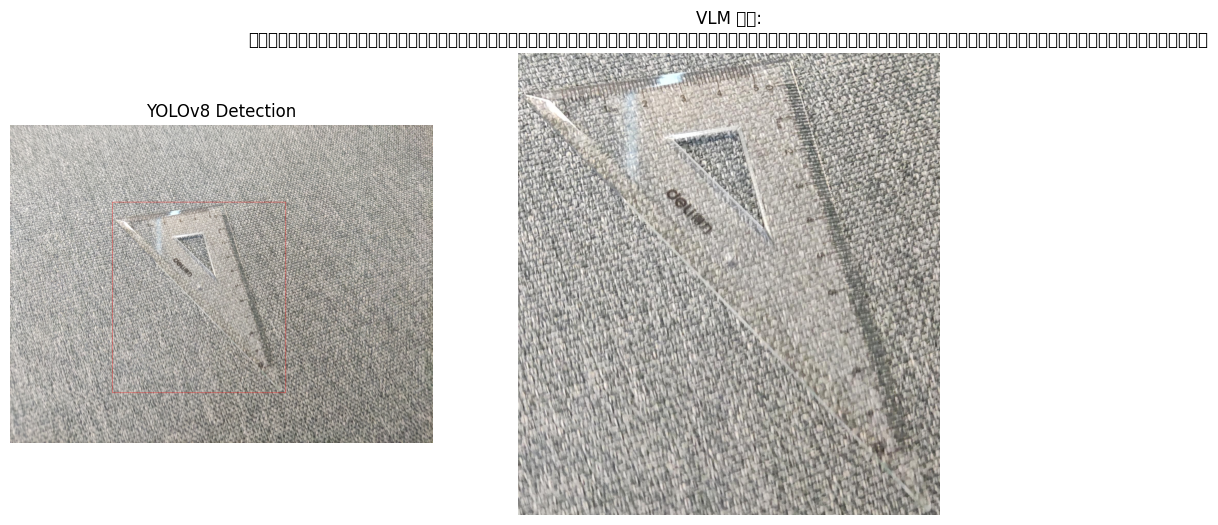

In [5]:
import torch
from ultralytics import YOLO
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from qwen_vl_utils import process_vision_info
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# 設置記憶體優化
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# 檢查記憶體函數
def print_memory_stats():
    print(f"已分配: {torch.cuda.memory_allocated() / 1024**3:.2f} GiB")
    print(f"已保留: {torch.cuda.memory_reserved() / 1024**3:.2f} GiB")

# 1. YOLOv8 檢測並裁剪
def run_yolo(image_path):
    print("運行 YOLOv8 前記憶體狀態：")
    print_memory_stats()
    
    yolo_model = YOLO('/workspace/s_best.pt', task='pose')
    image = Image.open(image_path).convert("RGB")
    results = yolo_model.predict(image_path, task='pose', save=False, imgsz=640)
    
    if len(results[0].boxes) > 0:
        box = results[0].boxes.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = map(int, box)
        cropped_image = image.crop((x1, y1, x2, y2))
        cropped_image.save("cropped_temp.jpg")
        print("裁剪圖片已保存，檢測框：", (x1, y1, x2, y2))
        cropped_image.save("cropped_check.jpg")
        print("裁剪圖片另存為 cropped_check.jpg，請檢查內容")
        return (x1, y1, x2, y2), image
    else:
        print("未檢測到物體")
        return None, image

# 2. VLM 生成描述
def run_vlm(image_path):
    print("運行 VLM 前記憶體狀態：")
    print_memory_stats()
    
    print("正在載入 Qwen2-VL 模型...")
    vlm_model = Qwen2VLForConditionalGeneration.from_pretrained(
        "Qwen/Qwen2-VL-2B-Instruct", torch_dtype=torch.float16, device_map="auto"
    )
    vlm_processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct")
    
    print("正在處理圖片...")
    cropped_image = Image.open(image_path).convert("RGB")
    cropped_image = cropped_image.resize((224, 224))
    
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image", "image": cropped_image},
                {"type": "text", "text": "這張圖片展示了一個工具或物品，請描述它的外觀和用途，特別注意它不是生物或食物。"}
            ],
        }
    ]
    
    print("正在生成輸入...")
    text = vlm_processor.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = vlm_processor(text=[text], images=image_inputs, videos=video_inputs, padding=True, return_tensors="pt")
    inputs = inputs.to("cuda")
    
    print("正在生成描述...")
    generated_ids = vlm_model.generate(**inputs, max_new_tokens=256)
    generated_ids_trimmed = [out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]
    description = vlm_processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True)[0]
    print("生成的描述：", description)
    return description

# 3. 顯示結果（保存為圖片）
def show_result(original_image, cropped_image_path, box, description):
    print("顯示結果，描述內容：", description)
    cropped_image = Image.open(cropped_image_path)
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    img_with_box = np.array(original_image)
    if box:
        x1, y1, x2, y2 = box
        img_with_box = cv2.rectangle(img_with_box, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.imshow(img_with_box)
    plt.title("YOLOv8 Detection")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(cropped_image)
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']  # 使用新安裝的字體
    plt.rcParams['axes.unicode_minus'] = False
    plt.title(f"VLM 描述:\n{description}")
    plt.axis("off")
    
    plt.savefig("result.png")
    print("結果已保存為 result.png")

# 主程式
if __name__ == "__main__":
    print("初始記憶體狀態：")
    print_memory_stats()
    
    image_path = "/workspace/MVIMG_20230331_082423.jpg"
    
    box, original_image = run_yolo(image_path)
    print("YOLOv8 檢測框：", box)
    torch.cuda.empty_cache()
    
    if box:
        description = run_vlm("cropped_temp.jpg")
        print("VLM 返回的描述：", description)
        show_result(original_image, "cropped_temp.jpg", box, description)
    else:
        print("無法生成描述，因為未檢測到物體")
    
    for temp_file in ["cropped_temp.jpg", "cropped_check.jpg"]:
        if os.path.exists(temp_file):
            os.remove(temp_file)
            print(f"已刪除臨時文件：{temp_file}")
    
    print("最終記憶體狀態：")
    print_memory_stats()

In [16]:
pip install "accelerate>=0.26.0"


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
!python -c "import accelerate; print(accelerate.__version__)"

1.6.0


In [21]:
!pip uninstall accelerate -y
!pip install "accelerate>=0.26.0"

Found existing installation: accelerate 1.6.0
Uninstalling accelerate-1.6.0:
  Successfully uninstalled accelerate-1.6.0
  Using cached accelerate-1.6.0-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.6.0-py3-none-any.whl (354 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
